# Cuaderno de Notas de Métodos Numéricos
## Interpolación: motivación y preliminares
### Prof. Jorge I. Zuluaga


#### Ejecutarme siempre

A continuación descargamos en el espacio virtual de este cuaderno todos los archivos necesarios para que las notas del curso funcionen bien:

In [ ]:
!git clone https://github.com/JorgeZuluaga/NotasMetodosNumericos
!ln -s NotasMetodosNumericos mn
!make -C mn pull

Cloning into 'NotasMetodosNumericos'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 108 (delta 46), reused 82 (delta 20), pack-reused 0
Receiving objects: 100% (108/108), 8.53 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (46/46), done.
make: Entering directory '/content/NotasMetodosNumericos'
git reset --hard HEAD
HEAD is now at 876de31 Commit
git pull origin master
From https://github.com/JorgeZuluaga/NotasMetodosNumericos
 * branch            master     -> FETCH_HEAD
Already up to date.
make: Leaving directory '/content/NotasMetodosNumericos'


## Un vistazo de la clase

  Qué veremos en esta clase:

  - Interpolación: motivación
  - Interpolación lineal.
  - Interpolación de Lagrange.

  Para leer en el libro: sección 3.1 "Interpolación y Polinomio de Lagrange" (hasta el Teorema 3.3 sin incluir este último).

## Motivación

- Cunado construimos modelos matemáticos o físicos, estamos acostumbrados a disponer de información detallada sobre las funciones que están implicadas en nuestros modelos.

- Por ejemplo, la altura de una pelota de Basket que es lanzada desde una altura $h$, con una velocidad inicial $v$ en un ángulo $\theta$ está dada por la **función continua**:

  $$
  y(t) = h + v t \sin \theta - \frac{1}{2}g t^2
  $$

- Esta función es provista por un modelo físico.  No es la función real, la que describe el fenómeno en el mundo allá afuera, que puede ser mucho más complicada y tal vez imposible de conocer.  Pero es una función útil para estudiar el fenómeno.

- Como es una función continua podemos realizar sobre ella las operaciones propias del cálculo, límites, derivación, integración, etc.  Incluso podemos usar esa función para encontrar sus raíces con los métodos vistos antes en el curso.

- Pero hay situaciones en las que no se dispone de una función exacta:

  - Durante la pandemia del Coronavirus se tomaron datos del número de personas $i(t)$ que resultaban contagiadas en un día específico.  Sin embargo no se sabe el valor de las personas contagiadas en cualquier instante de tiempo $t$ (a cualquier hora y en cualquier día).

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/datos-coronavirus.png" width=500>
  </center>

  - La tasa de cambio de una divisa a otra $D(t)$ puede cambiar en cada instante de tiempo, pero la verdad es que solo se publica el valor de esa tasa en momentos específicos de cada día.

  - La temperatura $T(t)$ en un lugar específico del planeta se puede medir en cada instante del tiempo, pero en realidad solo se publica su valor cada cierto intervalo de tiempo.

- La pregunta básica que intentaremos responder en esta parte del curso es:  ¿Cómo podemos estimar el valor de una función en cualquier punto en un intervalo dado, si solo sabemos su valor en unos pocos puntos de ese mismo intervalo?

- En palabras más precisas: ¿cómo construir una función continua $P(x)$ que aproxime de la mejor manera posible un función desconocida $f(x)$ para la cuál solo se conocen solo valores discretos $f(x_1)$, $f(x_2)$, $f(x_3)$, etc.?

- A este problema se lo conoce como la **aproximación de una función** y en esta parte del curso estudiaremos uno de los métodos para aproximar funciones conocido como **interpolación**.
  


## Interpolación Polinomial

- Uno de los métodos más utilizados para aproximar una función es el **método de interpolación polinomial**.  

- En el método de interpolación polinomial se pretende encontrar un polinomio o conjunto de *polinomios algebraicos*, que son funciones de la forma:

  $$
  P_{n}(x)=a_{n} x^{n}+a_{n-1} x^{n-1}+\cdots+a_{1} x+a_{0}
  $$

  tal que se cumpla que para un conjunto de $n+1$ valores $\{x_0, x_1, x_2, \cdots, x_n\}$ en un intervalo $[a,b]$ se cumpla, como mínimo que:

  $$
  f(x_i)=P(x_i)
  $$

- En la figura abajo se ilustra el objetivo buscado:

<center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/interpolacion-polinomial.png" width=500>
  </center>

- Al polinomio $P(x)$ (o conjunto de polinomios), se lo conoce como **polinomio interpolante**.

## Interpolación lineal

- Aunque el problema de la interpolación polinomial puede parecer intimidante, existe una solución muy simple que usamos con mucha frecuencia: la **interpolación lineal**.

- En la interpolación lineal se aproxima el valor de una función entre dos puntos, una línea recta (ver figura abajo).  Es decir en este caso el polinomio interpolante es de la forma:

  $$
  P_1(x) = m x + b
  $$
  donde $m$ es la pendiente de la recta y $b$ su intercepto.

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/interpolacion-lineal.png" width=500>
  </center>

- La pendiente de la reta que hay entre dos puntos $f(x_1)$ y $f(x_0)$ esta dada por:

  $$
  m = \frac{f(x_1) - f(x_0)}{x_1-x_0}
  $$

- Cualquier punto intermedio de la recta debe cumplir la misma condición:

  $$
  m = \frac{P_1(x) - f(x_0)}{x-x_0}
  $$

- Esto implica que el valor del polinomio en cualquier $x$ cumple la condición:

  $$
  \frac{P_1(x) - f(x_0)}{x-x_0} = \frac{f(x_1) - f(x_0)}{x_1-x_0}
  $$

- Si despejamos $P(x)$ podemos escribir:

  $$
  P_1(x) = \frac{x-x_1}{x_0-x_1} f(x_0) + \frac{x-x_0}{x_1-x_0} f(x_1)
  $$

- Varias características de está fórmula:

  - Nótese que el valor del polinomio en $x$ solo depende de cantidades conocidas, $x_0$, $x_1$, $f(x_0)$, $f(x_1)$. 

  - El polinomio puede escribirse también de la forma:

   $$
   P_1(x) = L_{1,0}(x) f(x_0) + L_{1,1}(x) f(x_1)
   $$

  - Los *coeficientes* que multiplican al valor de la función en cada punto reciben el conveniente nombre de $L_{1,i}$, donde el primer número en el subíndice se refiere al hecho de que estás fórmulas son para la interpolación lineal (polinomio de orden 1) y el segundo corresponde al punto en el que el polinomio es evaluado.
  
  - Las fórmulas de estos coeficientes son:

   $$
   L_{1,0}(x)=\frac{x-x_1}{x_0-x_1}
   $$
   $$
   L_{1,1}(x)=\frac{x-x_0}{x_1-x_0}
   $$

  - Una forma general en la que se pueden escribir estos coeficientes es:

   $$
   L_{1,i}=\frac{x-x_j}{x_i-x_j}
   $$
    
    nótese que en el numerador se usa el mismo $x$ del índice del coeficiente.  En el denominador se saca la diferencia entre los dos valores de $x$ pero en un orden específico.

### Un ejemplo de interpolación lineal

- Imaginemos que en una estación meteorológica se mide la temperatura del aire en 2 momentos del día, a las 8 a.m. (hora 8) y a las 12 m. (hora 12).  obteniendo 22 C y 27 C y queremos saber cuál es la temperatura a cualquier hora durante la mañana de ese día.

- En este caso la variable $x$ es el tiempo y la función $f(x)$ es la temperatura.

- Conocemos la función en dos puntos: $x_0=8$ cuando $f(x_0)=22$ y $x_1=12$ cuando $f(x_1)=27$.

- Si queremos calcular la temperatura a cualquier hora de la mañana $x$ la fórmula de interpolación lineal sería:

  $$
   P_1(x) = L_{1,0}(x) f(x_0) + L_{1,1}(x) f(x_1)
  $$

  donde:

  $$
  L_{1,0}(x) = \frac{x-x_1}{x_0-x_1} = \frac{x-12}{8-12} = -\frac{1}{4}(x-12)
  $$

  y 

  $$
  L_{1,1}(x) = \frac{x-x_0}{x_1-x_0} = \frac{x-12}{12-8} = \frac{1}{4}(x-8)
  $$

- En definitiva:

  $$
  P(x)=-\frac{22}{4}(x-12)+\frac{27}{4}(x-8)
  $$
  nótese que reemplazamos 22 y 27 que son las temperaturas a las 8 y a las 12.

- Podemos simplificar está fórmula produciendo:

  $$
  P(x)=\frac{5}{4}x + 12
  $$

- El valor de este polinomio a las 10:30 a.m. ($x=10.5$) es igual a:

  $$
  P(10.5)=25.125
  $$

- Es decir, usando la interpolación lineal y con los datos datos podemos decir que la temperatura a las 10:30 a.m. en el lugar en cuestión será cercana a los 25 C.

### Un algoritmo de interpolación lineal

- ¿Podríamos escribir un algoritmo para hacer interpolación lineal usando Python?

- Para ello necesitamos definir inicialmente 2 cosas: entradas y salidas:

  - Entradas: $x_0$, $x_1$, $f(x_0)$, $f(x_1)$ y $x$.
  - Salidas: $P(x)$.

- El algoritmo se muestra a continuación:

In [ ]:
def interpolacion_lineal(x0,x1,f0,f1,x):
  #Calculo de los coeficientes
  L10=(x-x1)/(x0-x1)
  L11=(x-x0)/(x1-x0)
  print(L10,L11)
  #Calculo del polinomio
  P=L10*f0+L11*f1
  return P

- Podemos probarlo con el ejemplo anterior:

In [ ]:
interpolacion_lineal(8,12,22,27,10.5)

0.375 0.625


25.125

- Más interesante aún es que podríamos usar `SymPy` para que esta misma rutina nos devuelva no un valor sino la fórmula del polinomio:

In [ ]:
import sympy as sp
def interpolacion_lineal_simbolica(x0,x1,f0,f1):
  #Definimos la x como una letra y no como un número
  x=sp.symbols("x")
  #Calculo de los coeficientes
  L10=(x-x1)/(x0-x1)
  L11=(x-x0)/(x1-x0)
  #Calculo del polinomio
  P=L10*f0+L11*f1
  return P

- Probemos con el ejemplo anterior:

In [ ]:
P=interpolacion_lineal_simbolica(8,12,22,27)
P

5*x/4 + 12

In [ ]:
P(10.5)

TypeError: ignored

- Una vez tenemos el polinomio simbólico podemos convertirlo en una función numérica de Python usando el *método* `lambdify` y esa función usarla para encontrar el valor del polinomio en en cualquier $x$:

In [ ]:
import sympy as sp
x=sp.symbols("x")
P=interpolacion_lineal_simbolica(8,12,22,27)
Pfun=sp.lambdify(x,P)
Pfun(10.5)

25.125

- Nótese que fue necesario definir la $x$ afuera de la llamada de la función porque aunque esa operación se hizo adentro, lo que ocurre dentro de una función se queda dentro de la función.

- Una alternativa para esto es crear un algoritmo que haga la interpolación lineal, convierta la expresión resultante en una función numérica y devuelva ambas, la expresión y la función numérica:

In [ ]:
import sympy as sp
def interpolacion_lineal_simbolica_numerica(x0,x1,f0,f1):
  #Definimos la x como una letra y no como un número
  x=sp.symbols("x")
  #Calculo de los coeficientes
  L10=(x-x1)/(x0-x1)
  L11=(x-x0)/(x1-x0)
  #Calculo del polinomio
  P=L10*f0+L11*f1
  #Convertir a una función numérica
  Pfun=sp.lambdify(x,P)
  return P,Pfun

- Que se usaría así:

In [ ]:
P,Pfun=interpolacion_lineal_simbolica_numerica(8,12,22,27)
P

5*x/4 + 12

In [ ]:
Pfun(10.5)

25.125

- Usando estas rutinas podemos hacer un gráfico del polinomio interpolante:

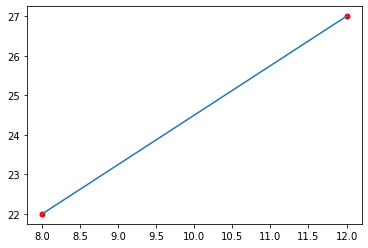

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Valores conocidos
x0=8
x1=12
f0=22
f1=27

#Interpolación
P,Pfun=interpolacion_lineal_simbolica_numerica(8,12,22,27)

#Valores desconocidos
xs=np.linspace(x0,x1,100)
Ps=Pfun(xs)

#Gráfico
plt.plot([x0,x1],[f0,f1],marker='o',linewidth=0,markersize=5,color='r')
plt.plot(xs,Ps)

## Interpolación de Lagrange

- Una generalización de lo que vimos en el caso de la interpolación lineal al caso en el que tenemos más de 2 puntos conduce a los **polinomios interpolantes de Lagrange**.

- Para ilustrar la generalización supongamos que ahora en vez de 2 puntos, tenemos 3 puntos, $x_0$, $x_1$ y $x_2$ en los que conocemos el valor de la función $f(x_0)$, $f(x_1)$ y $f(x_2)$. 

- El valor del polinomio interpolante de Lagrange es ahora:

  $$
  P_2(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0)+
  \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1)+
  \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)
  $$
  el número 2 tiene que ver con que ese polinomio es ahora de orden 2 (cuadrático).

- Pero ¿cómo lo supo Lagrange?.  Nótese que cuando, por ejemplo, $x=x_0$, los últimos dos terminos de este polinomio (que contienen expresiones del tipo $x-x_0$ se hacen cero, y el primero termino se hace igual a:

  $$
  P(x_0) = \frac{(x_0-x_1)(x_0-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0)=f(x_0)
  $$
  *Voilà!*

- Así con todos los demás valores de $x_i$.

- Una forma general de escribir este polinomio, usando la idea de los coeficientes $L$ que vimos antes es:

  $$
  P_2(x) = L_{2,0}(x)f(x_0)+L_{2,1}(x)f(x_1)+L_{2,2}(x)f(x_2)
  $$
  donde:

  $$
  L_{2,i}(x)=\frac{(x-x_j)(x-x_k)}{(x_i-x_j)(x_i-x_k)}
  $$
  miren que en el numerador los $x$ que se usan deben ser distintos del $x_i$ (que es el número del coeficiente $L_{2,i}$) y en el denominador el primer $x$ que se usa es el $x_i$.  También arriba no aparece nunca $x-x_i$.

### Generalización a polinomios de cualquier grado

- Los resultados anteriores para el caso de la interpolación lineal (2 puntos) y la interpolación de grado 2 (3 puntos) se generalizan para un número general de puntos usando el siguiente teorema:

- **Teorema de interpolación de Lagrange**. Si $x_{0}, x_{1}, \ldots, x_{n}$ son $n+1$ números distintos y $f$ es una función cuyos valores están determinados en estos números, entonces existe un único polinomio $P(x)$ de grado a lo sumo $n$ con
$$
f\left(x_{k}\right)=P\left(x_{k}\right), \quad \text { para cada } k=0,1, \ldots, n .
$$
Este polinomio está determinado por
$$
P(x)=f\left(x_{0}\right) L_{n, 0}(x)+\cdots+f\left(x_{n}\right) L_{n, n}(x)=\sum_{k=0}^{n} f\left(x_{k}\right) L_{n, k}(x)
$$
donde, para cada $k=0,1, \ldots, n$,
$$
\begin{aligned}
L_{n, k}(x) &=\frac{\left(x-x_{0}\right)\left(x-x_{1}\right) \cdots\left(x-x_{k-1}\right)\left(x-x_{k+1}\right) \cdots\left(x-x_{n}\right)}{\left(x_{k}-x_{0}\right)\left(x_{k}-x_{1}\right) \cdots\left(x_{k}-x_{k-1}\right)\left(x_{k}-x_{k+1}\right) \cdots\left(x_{k}-x_{n}\right)} \\
&=\prod_{\substack{i=0 \\
i \neq k}}^{n} \frac{\left(x-x_{i}\right)}{\left(x_{k}-x_{i}\right)}
\end{aligned}
$$

### Ejemplo de polinomio interpolante de Lagrange de orden superior

- **Ejercicio 5.a** De una función desconocida se conocen los siguientes valores: $f(8.1)=16.94410, f(8.3)=17.56492, f(8.6)=18.50515, f(8.7)=18.82091$.  Encuentre el valor $f(8.4)$ usando:

  1. Interpolación lineal.
  2. Interpolación cuadrática.
  3. Interpolación del máximo orden posible.

- **Solución**. 

  1. Para la interpolación lineal debemos usar dos puntos alrededor del pundo de interés.  En este caso $x_0=8.3$ y $x_1=8.6$.  El polinomio interpolante será en este caso:

   $$ 
   P_1(x)=\frac{x-8.6}{8.3-8.6}17.56492+\frac{x-8.3}{8.6-8.3}18.50515
   $$
   al evaluarlo en $x=8.4$ nos da:

   $$
   f(8.4)\approx P_1(8.4)=17.87833
   $$
   Podemos combrobarlo usando nuestro algoritmo en Python:

In [ ]:
x0=8.3
f0=17.56492
x1=8.6
f1=18.50515
x=8.4
interpolacion_lineal(x0,x1,f0,f1,x)

17.87833

- **(Solución cont.)**:

  2. Para la interpolación cuadrática debemos usar 3 puntos alrededor del punto de interés.  Aquí ya hay varias opciones: $x_0=8.3$ y $x_1=8.6$, $x_2=8.7$ o también: $x_0=8.1$, $x_1=8.3$ y $x_2=8.6$.  Probemos las dos:

   - Con el primer conjunto:

   $$
   P_2(x)=
   \frac{(x-8.6)(x-8.7)}{(8.3-8.6)(8.3-8.7)}17.56492+
   \frac{(x-8.3)(x-8.7)}{(8.6-8.3)(8.6-8.7)}18.50515+
   \frac{(x-8.3)(x-8.6)}{(8.7-8.3)(8.7-8.6)}18.82091
   $$

   - Con el segundo conjunto de valores:

   $$
   P_2(x)=
   \frac{(x-8.3)(x-8.6)}{(8.1-8.3)(8.1-8.6)}16.94410+
   \frac{(x-8.1)(x-8.7)}{(8.3-8.1)(8.3-8.7)}17.56492+
   \frac{(x-8.1)(x-8.3)}{(8.6-8.1)(8.6-8.3)}18.50515
   $$

  3. El máximo orden posible en este caso es 3 porque tenemos 4 puntos: $x_0, x_1, x_2, x_3$.  La fórmula ya es muy laboriosa de escribir.

- Como se ve en el ejemplo anterior, cuando el número de puntos es muy grande, la interpolación se hace más laboriosa de hacer.  

- Es importante entonces tener algoritmos automáticos para que faciliten la interpolación.  

- A continuación se muestra un algoritmo que implementa la interpolación de Lagrange, simbólica y numérica:

In [ ]:
def interpolacion_lagrange(xs,fs):
  import sympy as sp
  x=sp.symbols("x")
  #Número de puntos
  N=len(xs)
  #Lista con las L
  Ls=[0]*N
  #Cálculo de las L
  for n in range(N):
    Ls[n]=1.0
    for k in range(N):
      if k!=n:
        Ls[n]=Ls[n]*(x-xs[k])/(xs[n]-xs[k])
  #Cálculo del polinomio
  P=0
  for i in range(N):
    P=P+Ls[i]*fs[i]
  #Simplificacion
  P=sp.simplify(P)
  #Numérico
  Pfun=sp.lambdify(x,P)

  return P,Pfun

In [ ]:
xs=[8.1,8.3,8.6,8.7]
fs=[16.94410,17.56492,18.50515,18.82091]
P,Pfun=interpolacion_lagrange(xs,fs)
P

-0.00208333333335986*x**3 + 0.112083333324335*x**2 + 1.68620416670456*x - 2.96077250011149

- Para resolver el último punto del ejemplo usando este resultado se usa:

In [ ]:
Pfun(8.4)

17.87714249955617

- Podemos hacer un gráfico de los datos y del polinomio interpolante como lo hicimos en el caso de la interpolación lineal:

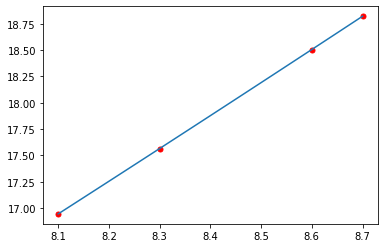

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Datos e interpolación
xs=[8.1,8.3,8.6,8.7]
fs=[16.94410,17.56492,18.50515,18.82091]
P,Pfun=interpolacion_lagrange(xs,fs)

#Valores desconocidos
xes=np.linspace(xs[0],xs[-1],100)
Pes=Pfun(xes)

#Gráfico
plt.plot(xs,fs,marker='o',linewidth=0,markersize=5,color='r')
plt.plot(xes,Pes)


## Continuará...

## Ejercicios

- Resolver los ejercicios de la sección 3.1:

  - Ejercicio 1, literal b.
  - Ejercicio 2, literal d. 
  - Ejercicio 5, literal d.


-----
*Fin*